# Exercises

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [152]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [153]:
# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=125)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=125)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.
    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [154]:
### Choose features other than the ones used in the lesson
X = train_scaled[['sepal_width', 'petal_width']]

# create k means object
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# create var for predicted cluster
kmeans_pred = kmeans.predict(X)

# add cluster to the train df
train['cluster'] = kmeans_pred

In [155]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
131,7.9,3.8,6.4,2.0,virginica,2
102,7.1,3.0,5.9,2.1,virginica,2
99,5.7,2.8,4.1,1.3,versicolor,1
2,4.7,3.2,1.3,0.2,setosa,0
39,5.1,3.4,1.5,0.2,setosa,0


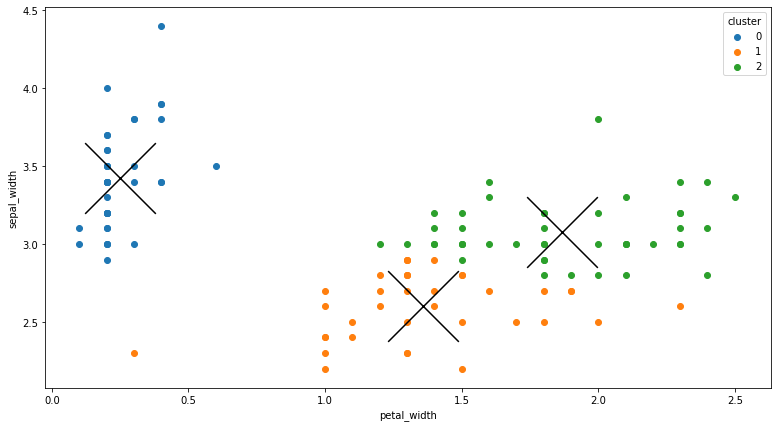

In [156]:
### Visualize the results of your clustering

# create figure and axes var for subplot
fig, ax = plt.subplots(figsize=(13, 7))
# for every cluster in the subset of the cluster group
for cluster, subset in train.groupby('cluster'):
    # create a scatterplot for petal_width vs. sepal_width 
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
# create a legend with the title 'cluster'
ax.legend(title='cluster')
# set the x and y labels for plots
ax.set(ylabel='sepal width', xlabel='petal width')

#plot the cluster centroids on the chart of sepal_width vs petal width
train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')

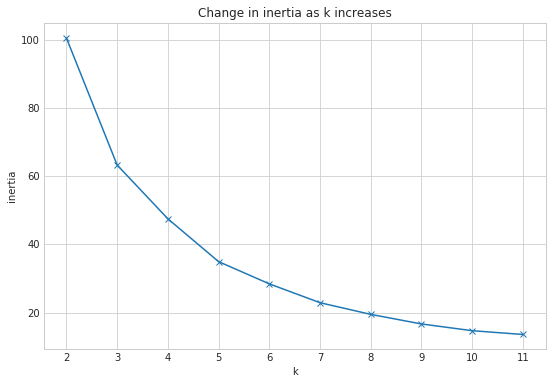

In [157]:
### Use the elbow method to visually select a good value for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

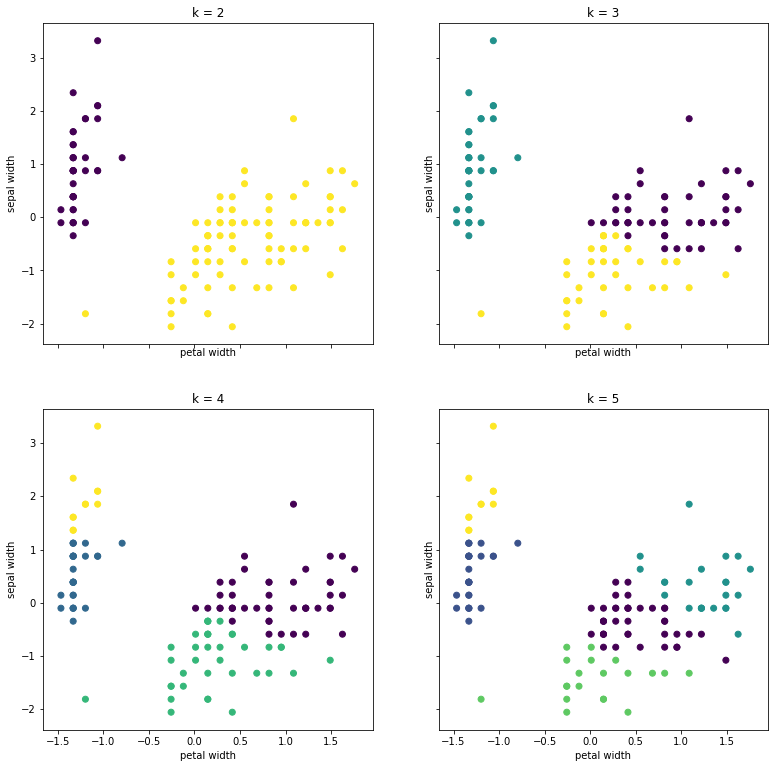

In [158]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

**takeaways: k = 3 is the most sensible**

In [159]:
### Repeat the clustering, this time with 3 different features
X2 = train_scaled[['petal_length', 'petal_width']]

# create k means object
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2)

# create var for predicted cluster
kmeans_pred2 = kmeans2.predict(X2)

# add cluster to the train df
train['cluster'] = kmeans_pred2

In [160]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
131,7.9,3.8,6.4,2.0,virginica,0
102,7.1,3.0,5.9,2.1,virginica,0
99,5.7,2.8,4.1,1.3,versicolor,2
2,4.7,3.2,1.3,0.2,setosa,1
39,5.1,3.4,1.5,0.2,setosa,1


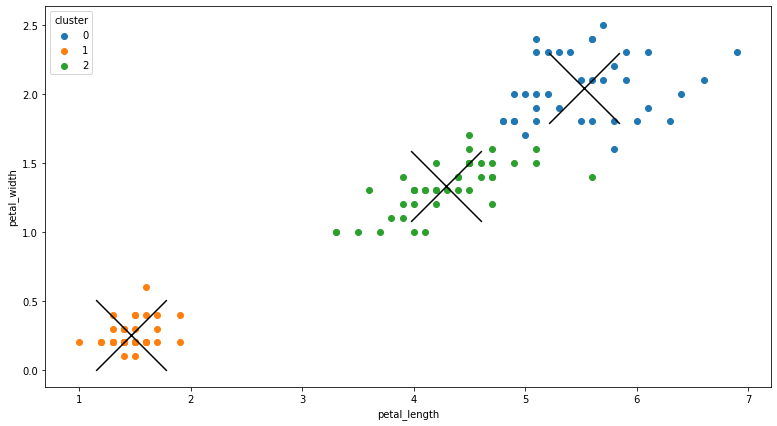

In [161]:
### Visualize the results of your clustering

# create figure and axes var for subplot
fig, ax = plt.subplots(figsize=(13, 7))
# for every cluster in the subset of the cluster group
for cluster, subset in train.groupby('cluster'):
    # create a scatterplot for petal_width vs. sepal_width 
    ax.scatter(subset.petal_length, subset.petal_width, label=cluster)
# create a legend with the title 'cluster'
ax.legend(title='cluster')
# set the x and y labels for plots
ax.set(ylabel='petal width', xlabel='petal length')

#plot the cluster centroids on the chart of sepal_width vs petal width
train.groupby('cluster').mean().plot.scatter(y='petal_width', x='petal_length', marker='x', s=5000, ax=ax, c='black')

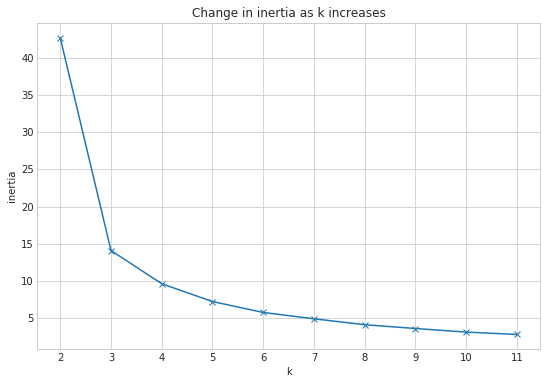

In [162]:
### Use the elbow method to visually select a good value for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

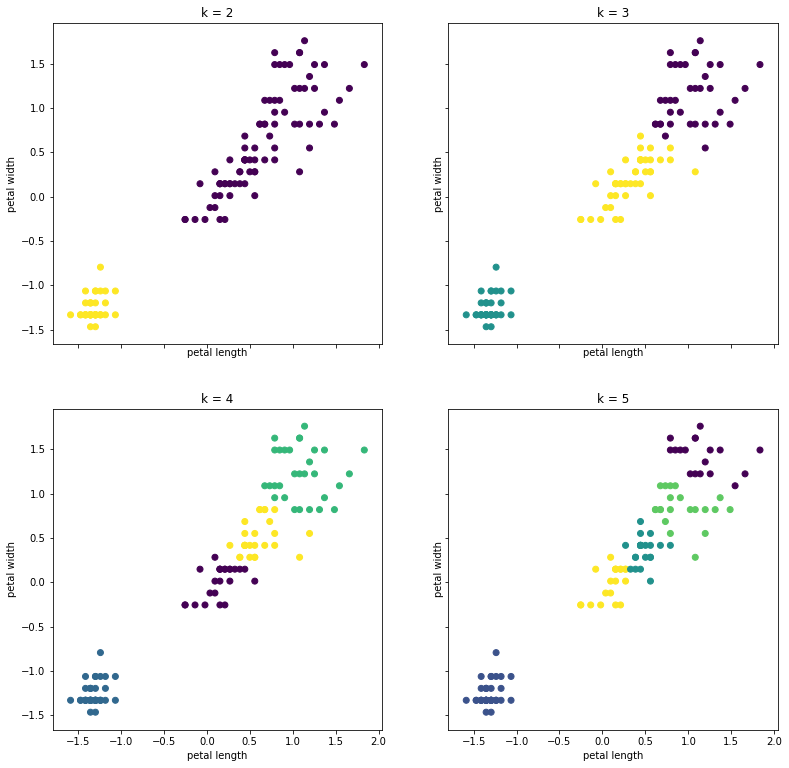

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X2).predict(X2)
    ax.scatter(X2.petal_length, X2.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

**takeaways: k = 3 is the most sensible. More obvious on this one**

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [164]:
mall = pd.read_csv('mall_customers.csv', index_col=0)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
train, validate, test = wrangle_mall.mall_split(mall)
train, validate, test = wrangle_mall.one_hot_encoder(train, validate, test, ['gender'])

In [166]:
train.head()

,customer_id,gender,age,annual_income,spending_score,Female,Male
123,124,Male,39,69,91,0.0,1.0
76,77,Female,45,54,53,1.0,0.0
171,172,Male,28,87,75,0.0,1.0
10,11,Male,67,19,14,0.0,1.0
35,36,Female,21,33,81,1.0,0.0


In [167]:
useful_cols = train.drop(columns=['customer_id', 'gender', 'Female'])

In [148]:
useful_cols.head()

,age,annual_income,spending_score,Male
123,39,69,91,1.0
76,45,54,53,0.0
171,28,87,75,1.0
10,67,19,14,1.0
35,21,33,81,0.0


In [171]:
# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

KeyError: "None of [Index(['petal_length', 'sepal_length', 'petal_width', 'sepal_width'], dtype='object')] are in the [columns]"

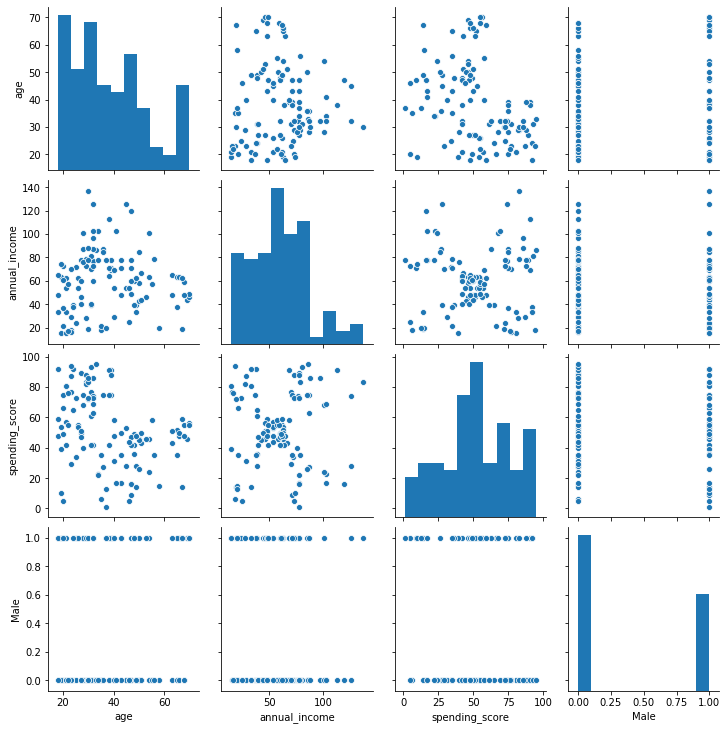

In [140]:
sns.pairplot(useful_cols)

In [168]:
# choose features
X3 = train_scaled[['annual_income', 'spending_score']]

# create k means object
kmeans3 = KMeans(n_clusters=5)
kmeans3.fit(X3)

# create var for predicted cluster
kmeans_pred3 = kmeans3.predict(X3)

# add cluster to the train df
train['cluster'] = kmeans_pred3

train.head()

KeyError: "None of [Index(['annual_income', 'spending_score'], dtype='object')] are in the [columns]"

KeyError: 'cluster'

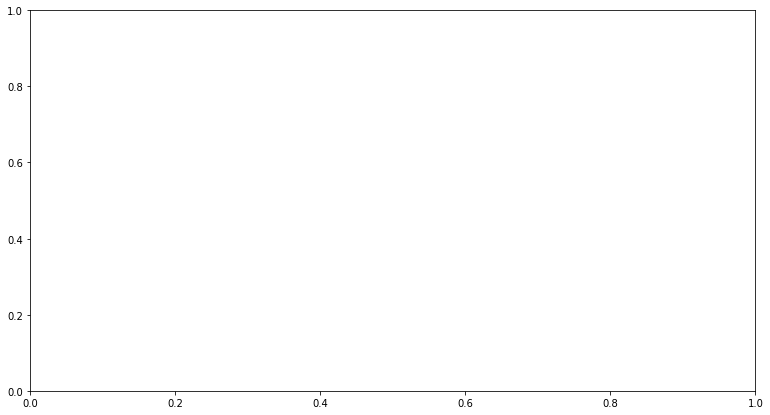

In [170]:
# Visualize the results of your clustering
fig, ax = plt.subplots(figsize=(13, 7))
for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Spending Score', xlabel='Annual Income')

train.groupby('cluster').mean().plot.scatter(y='spending_score', x='annual_income', marker='x', s=5000, ax=ax, c='black')

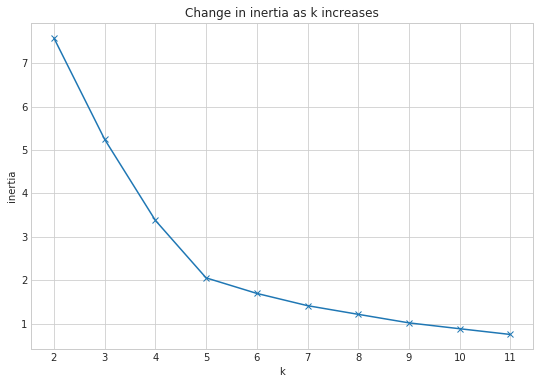

In [173]:
# Use the elbow method to visually select a good value for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

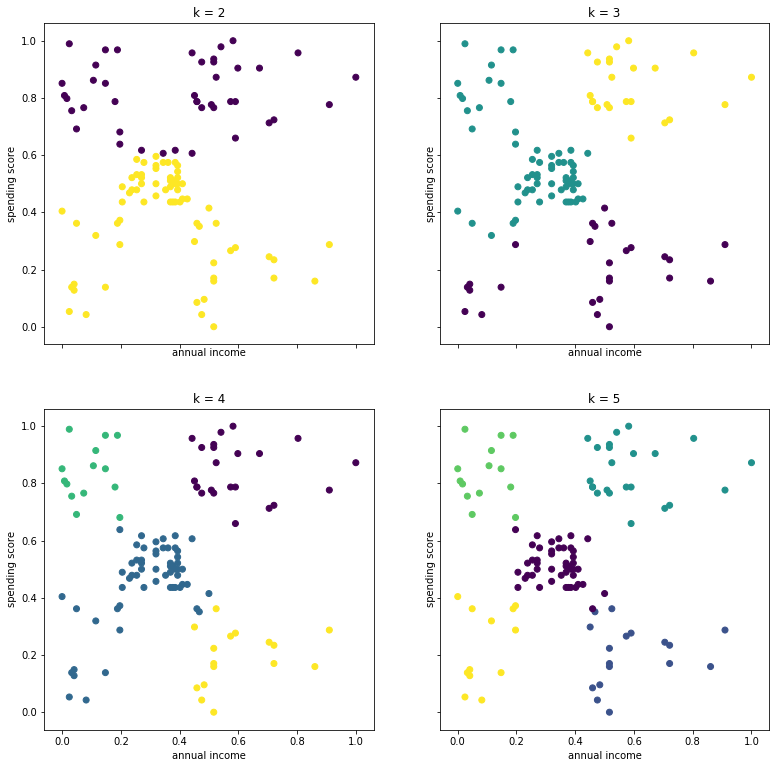

In [172]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X3).predict(X3)
    ax.scatter(X3.annual_income, X3.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score')

**takeaways: k = 5 is the most sensible**

3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.